## Descarga de capchas

In [4]:
# código para descargar las imágenes capcha

# !pip install selenium # para instalar selenium

from selenium import webdriver
from selenium.webdriver.common.by import By
import os

# Configuración de Selenium
options = webdriver.FirefoxOptions()
options.add_argument("--headless")  # Ejecuta Chrome sin GUI
driver = webdriver.Firefox(options=options)

out_dir = "descarga"
os.makedirs(out_dir, exist_ok=True)

for i in range(10):
    # Navegar a la URL del CAPTCHA
    captcha_url = "https://stduni.uni.edu.pe/modalum/"
    driver.get(captcha_url) # para actualizar el capcha
    captcha_url = "https://stduni.uni.edu.pe/modalum/CaptchaV2.aspx"
    driver.get(captcha_url)

    # Guardar la imagen en el disco
    filename = out_dir + "/" + ('00000' + str(i+1))[-5:] + '.png'
    driver.find_element(by=By.XPATH, value="/html/body/img").screenshot(filename) # noqa
    print(filename)

# Cerrar el navegador
driver.quit()

descarga/00001.png
descarga/00002.png
descarga/00003.png
descarga/00004.png
descarga/00005.png
descarga/00006.png
descarga/00007.png
descarga/00008.png
descarga/00009.png
descarga/00010.png


## Renombrar imágenes

Archivo encontrado: descarga\dd.png


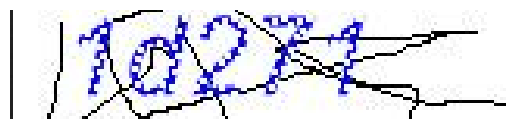

1d271


In [7]:
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

carpeta = Path("descarga")
out_dir = "content"
os.makedirs(out_dir, exist_ok=True)

archivo = [arc for arc in carpeta.iterdir()][0]
if archivo.is_file():
    print("Archivo encontrado:", archivo)
    image = cv2.imread(archivo)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    name = input()
    if len(name) != 5:
        print("El nombre del capcha debe ser de 5 letras")
        assert(False)
    print(name)
    output_path = out_dir + "/" + name + ".png"
    cv2.imwrite(output_path, image)

    ruta_archivo = archivo

    # Verificar si el archivo existe antes de eliminarlo
    if os.path.exists(archivo):
        os.remove(archivo)
    else:
        print(f"El archivo no existe: {archivo}")




## Borrar Líneas

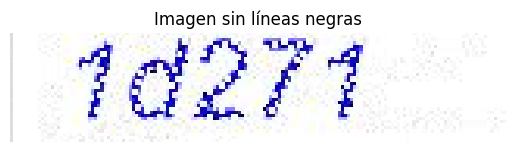

Imagen guardada en content_without_lines/1d271.png


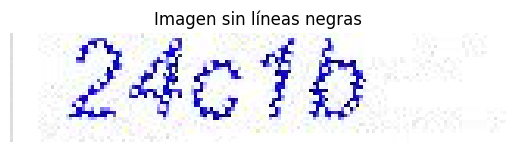

Imagen guardada en content_without_lines/2401b.png


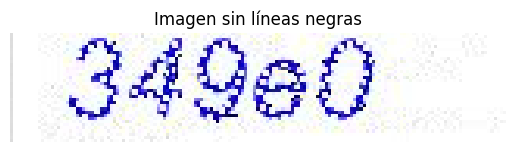

Imagen guardada en content_without_lines/349e0.png


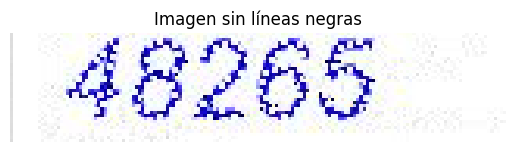

Imagen guardada en content_without_lines/48265.png


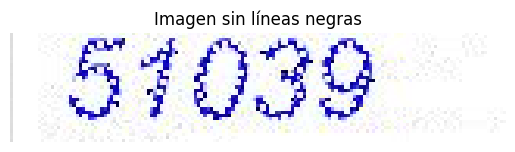

Imagen guardada en content_without_lines/51039.png
Imagen guardada en content_without_lines/70259.png
Imagen guardada en content_without_lines/756c1.png
Imagen guardada en content_without_lines/91669.png
Imagen guardada en content_without_lines/9b0b1.png
Imagen guardada en content_without_lines/f08d5.png


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Ruta de la carpeta que deseas recorrer
carpeta = Path("content")
out_dir = "content_without_lines"
os.makedirs(out_dir, exist_ok=True)

cant_mostrar = 5
# Iterar sobre todos los archivos en la carpeta
for archivo in carpeta.iterdir():
    # Cargar la imagen original (RGB)
    image_path = str(archivo)
    image = cv2.imread(image_path)

    # Convertir la imagen al espacio de color HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definir el rango para los colores negros en HSV
    lower_black = np.array([0, 0, 0])      # Valor más bajo para negro
    upper_black = np.array([180, 255, 50]) # Valor más alto para negro

    # Crear una máscara que identifique las áreas negras
    mask = cv2.inRange(hsv, lower_black, upper_black)

    # Invertir la máscara para eliminar las líneas negras
    image_no_lines = cv2.bitwise_not(image, image, mask=mask)

    # Mostrar la imagen sin las líneas negras
    if cant_mostrar > 0:
        plt.imshow(cv2.cvtColor(image_no_lines, cv2.COLOR_BGR2RGB))
        plt.title('Imagen sin líneas negras')
        plt.axis('off')
        plt.show()
        cant_mostrar -= 1

    # Guardar la imagen sin las líneas negras
    output_path = out_dir + "/" + str(archivo)[-9:]
    if cv2.imwrite(output_path, image_no_lines):
        print(f"Imagen guardada en {output_path}")
    else:
        print("Error al guardar la imagen")


## Imagen en blanco y negro 

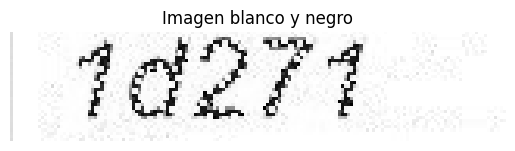

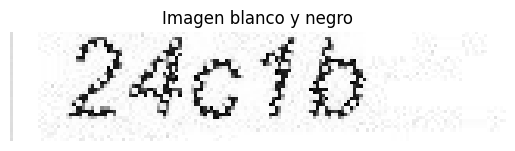

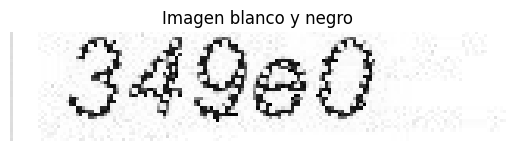

In [ ]:
from PIL import Image
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Ruta de la carpeta que deseas recorrer
carpeta = Path("content_without_lines")
out_dir = "content_black_white"
os.makedirs(out_dir, exist_ok=True)

cant_mostrar = 5

# Iterar sobre todos los archivos en la carpeta
for archivo in carpeta.iterdir():
    # Ruta de la imagen en formato RGB
    image_path = str(archivo)

    # Cargar la imagen usando PIL
    image = Image.open(image_path)

    # Convertir la imagen a escala de grises
    image_gray = image.convert("L")

    if cant_mostrar > 0:
        plt.imshow(image_gray, cmap="gray")
        plt.title('Imagen blanco y negro')
        plt.axis('off')
        plt.show()
        cant_mostrar -= 1

    # Guardar la imagen en escala de grises (opcional)
    output_path = out_dir + "/" + str(archivo)[-9:]
    image_gray.save(output_path)
    if os.path.exists(archivo):
        os.remove(archivo)
    else:
        print(f"El archivo no existe: {archivo}")


## Separar imágenes

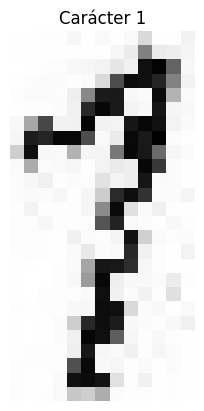

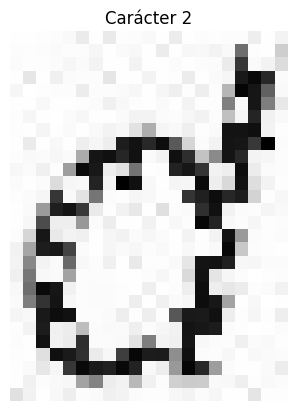

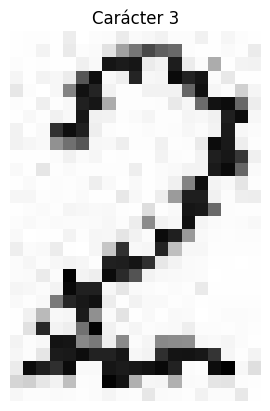

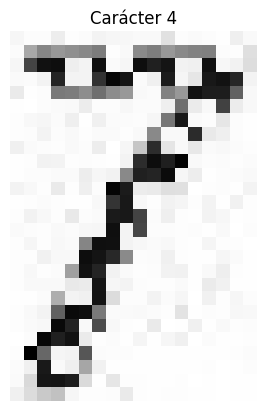

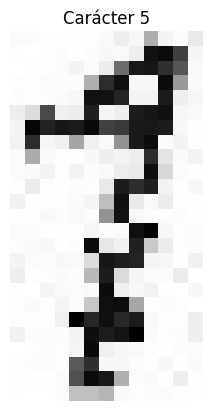

Caracteres segmentados guardados en: content_char_by_char/1d271/
Caracteres segmentados guardados en: content_char_by_char/2401b/
Caracteres segmentados guardados en: content_char_by_char/349e0/
Caracteres segmentados guardados en: content_char_by_char/48265/
Caracteres segmentados guardados en: content_char_by_char/51039/
Caracteres segmentados guardados en: content_char_by_char/70259/
Caracteres segmentados guardados en: content_char_by_char/756c1/
Caracteres segmentados guardados en: content_char_by_char/91669/
Caracteres segmentados guardados en: content_char_by_char/9b0b1/
No se puso separar correctamente: content_black_white\f08d5.png


In [15]:
import cv2
import numpy as np
import os
from pathlib import Path

# Función para ordenar los contornos de izquierda a derecha
def ordenar_contornos(contornos):
    return sorted(contornos, key=lambda c: cv2.boundingRect(c)[0])

# Ruta de la carpeta que deseas recorrer
carpeta = Path("content_black_white")

mostrar_imagenes = 5

# Iterar sobre todos los archivos en la carpeta
for archivo in carpeta.iterdir():
    # Cargar la imagen en escala de grises usando OpenCV
    image_path = str(archivo)
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar binarización usando el método de Otsu
    _, image_binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Dilatar la imagen para hacer los caracteres más grandes y pegarlos mejor
    kernel = np.ones((3, 3), np.uint8)
    image_dilated = cv2.dilate(image_binary, kernel, iterations=1)

    # Encontrar los contornos de los caracteres
    contours, _ = cv2.findContours(image_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos muy pequeños que no sean caracteres
    min_area = 1  # Ajuste más bajo para caracteres más pequeños
    contours = [c for c in contours if cv2.contourArea(c) > min_area]

    # Ordenar los contornos de izquierda a derecha
    contours = ordenar_contornos(contours)

    # Recorrer los contornos y guardar cada carácter como una sub-imagen
    if len(contours) == 5:
        # Crear una carpeta de salida para guardar las sub-imágenes de los caracteres
        output_dir = "content_char_by_char/" + image_path[-9:-4] + "/"
        os.makedirs(output_dir, exist_ok=True)
        for idx, contour in enumerate(contours):
            # Obtener el rectángulo delimitador para cada carácter
            x, y, w, h = cv2.boundingRect(contour)

            # Extraer el carácter como una sub-imagen
            char_image = image_gray[y:y+h, x:x+w]

            # Guardar la sub-imagen
            image_name = "c" + str(idx) + "_" + image_path[-9:][idx] + ".png"
            output_path = output_dir + image_name
            cv2.imwrite(output_path, char_image)

            if mostrar_imagenes > 0:
                # Mostrar cada sub-imagen de carácter
                plt.imshow(char_image, cmap='gray')
                plt.title(f'Carácter {idx+1}')
                plt.axis('off')
                plt.show()
                mostrar_imagenes -= 1

        print(f"Caracteres segmentados guardados en: {output_dir}")
    else:
        print("No se puso separar correctamente:", archivo)

    if os.path.exists(archivo):
        os.remove(archivo)
    else:
        print(f"El archivo no existe: {archivo}")

## Quitar Borde

El directorio no está vacio: content_char_by_char
content_char_by_char_without_borde/1d271/c0_1.png


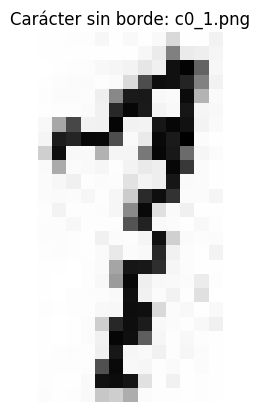

content_char_by_char_without_borde/1d271/c1_d.png


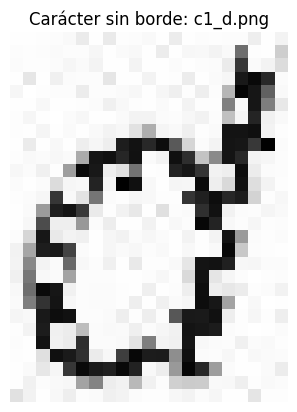

content_char_by_char_without_borde/1d271/c2_2.png


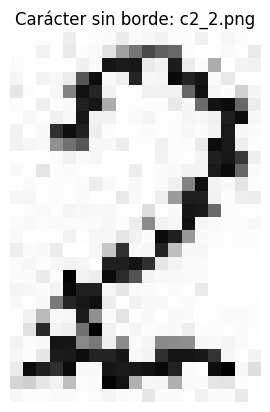

content_char_by_char_without_borde/1d271/c3_7.png


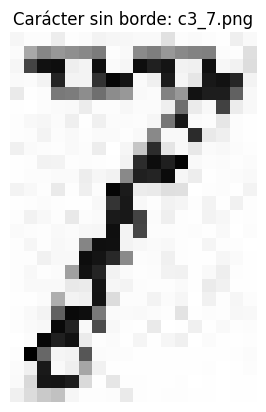

content_char_by_char_without_borde/1d271/c4_1.png


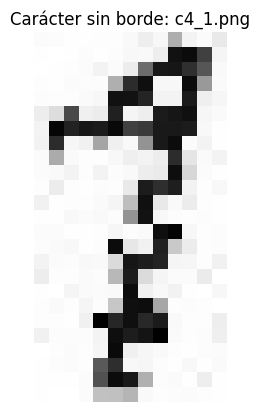

content_char_by_char_without_borde/2401b/c0_2.png
content_char_by_char_without_borde/2401b/c1_4.png
content_char_by_char_without_borde/2401b/c2_0.png
content_char_by_char_without_borde/2401b/c3_1.png
content_char_by_char_without_borde/2401b/c4_b.png
content_char_by_char_without_borde/349e0/c0_3.png
content_char_by_char_without_borde/349e0/c1_4.png
content_char_by_char_without_borde/349e0/c2_9.png
content_char_by_char_without_borde/349e0/c3_e.png
content_char_by_char_without_borde/349e0/c4_0.png
content_char_by_char_without_borde/48265/c0_4.png
content_char_by_char_without_borde/48265/c1_8.png
content_char_by_char_without_borde/48265/c2_2.png
content_char_by_char_without_borde/48265/c3_6.png
content_char_by_char_without_borde/48265/c4_5.png
content_char_by_char_without_borde/51039/c0_5.png
content_char_by_char_without_borde/51039/c1_1.png
content_char_by_char_without_borde/51039/c2_0.png
content_char_by_char_without_borde/51039/c3_3.png
content_char_by_char_without_borde/51039/c4_9.png


In [16]:
import cv2
import os
import matplotlib.pyplot as plt

# Función para eliminar el borde de una imagen
def eliminar_borde(image):
    # Encontrar los píxeles no blancos (donde el carácter está presente)
    coords = cv2.findNonZero(image)  # Encuentra los píxeles diferentes de cero
    x, y, w, h = cv2.boundingRect(coords)  # Encuentra el rectángulo que cubre los píxeles no blancos
    return image[y:y+h, x:x+w]  # Recortar la imagen a este rectángulo

# Ruta de la carpeta donde están las sub-imágenes segmentadas
carpeta_segmentados = "content_char_by_char"

# Crear una carpeta para guardar las imágenes sin borde
output_dir_sin_borde = "content_char_by_char_without_borde"

# Recorrer cada archivo en la carpeta de caracteres segmentados
nombres_archivos = os.listdir(carpeta_segmentados)

# Cantidad de imágenes que se mostraran para ver el proceso
mostrar_imagenes = 5

for directorio, subcarpetas, archivos in os.walk(carpeta_segmentados):
    for archivo in archivos:
        # Cargar la imagen de carácter en escala de grises
        image_path = os.path.join(directorio, archivo)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Eliminar el borde de la imagen
        image_sin_borde = eliminar_borde(image)

        # Guardar la imagen sin borde
        output_dir = output_dir_sin_borde + "/" + directorio[-5:] 
        os.makedirs(output_dir, exist_ok=True)
        output_path = output_dir + "/" + archivo
        print(output_path)
        cv2.imwrite(output_path, image_sin_borde)

        if mostrar_imagenes > 0:
            # Mostrar la imagen sin borde
            plt.imshow(image_sin_borde, cmap='gray')
            plt.title(f"Carácter sin borde: {archivo}")
            plt.axis('off')
            plt.show()
            mostrar_imagenes -= 1
        
        if os.path.exists(image_path):
            os.remove(image_path)
        else:
            print(f"El archivo no existe: {image_path}")
    
    if os.path.exists(directorio) and not(os.listdir(directorio)):
        os.rmdir(directorio)
    else:
        print(f"El directorio no está vacio: {directorio}")

print(f"Imágenes sin borde guardadas en: {output_dir_sin_borde}")

In [17]:
import cv2
import os
import numpy as np
import pandas as pd

# Definir el tamaño del contenedor (ancho y alto)
W, H = 20, 30  # Puedes ajustar estas dimensiones según sea necesario

# Ruta de la carpeta donde están las imágenes sin borde (sub-imágenes)
carpeta_caracteres_sin_bordes = "content_char_by_char_without_borde"

# Lista para almacenar los vectores de características y los estados (caracteres reales)
dataset = []

for directorio, _, archivos in os.walk(carpeta_caracteres_sin_bordes):
    for nombre in archivos:
        # Cargar la imagen de carácter en escala de grises
        image_path = os.path.join(directorio, nombre)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Redimensionar la imagen al tamaño del contenedor (W x H)
        image_resized = cv2.resize(image, (W, H))

        # Convertir la imagen redimensionada en un vector de tamaño W*H
        vector_caracter = image_resized.flatten()

        # Extraer el carácter desde el nombre del archivo
        estado = nombre[3]  # Nombre del archivo es el carácter (c1_a.png)

        # Agregar el vector de características y el estado al dataset
        dataset.append(np.append(estado, vector_caracter))

# Convertir el dataset en un DataFrame de pandas
columnas = ["caracter"] + [f"px{i}" for i in range(W * H)]
df = pd.DataFrame(dataset, columns=columnas)

# Guardar el dataset en un archivo CSV (opcional)
df.to_csv("dataset_caracteres.csv", index=False)

# Mostrar las primeras filas del dataset
df.head()

,caracter,px0,px1,px2,px3,px4,px5,px6,px7,px8,...,px590,px591,px592,px593,px594,px595,px596,px597,px598,px599
0,0,253,253,250,252,252,252,253,251,252,...,247,242,245,253,250,245,251,254,251,222
1,5,248,252,246,248,252,247,240,247,252,...,251,252,251,253,253,249,245,254,252,248
2,c,243,251,247,248,254,252,242,252,248,...,253,253,252,248,253,254,248,246,252,246
3,9,252,252,246,251,250,247,250,241,244,...,249,248,250,249,251,254,255,255,255,255
4,f,253,253,252,251,252,249,244,251,252,...,253,254,254,253,252,250,250,248,250,255


## Contando caracteres

In [18]:
import pandas as pd
import os

letters = [chr((i) + ord("a")) for i in range(26)]
numbers = [str(i) for i in range(10)]
letters_f = [0 for _ in range(26)]
numbers_f = [0 for _ in range(10)]
carpeta = "content_char_by_char_without_borde"
for directorio, subcarpetas, archivos in os.walk(carpeta):
    for archivo in archivos:
        c = archivo[3]
        if 'a' <= c <= 'z': letters_f[ord(c) - ord("a")] += 1
        if '0' <= c <= '9': numbers_f[ord(c) - ord("0")] += 1

dfL = pd.DataFrame([letters_f], columns=letters)
dfN = pd.DataFrame([numbers_f], columns=numbers)
print(dfL)
print(dfN)

   a  b  c  d  e  f  g  h  i  j  ...  q  r  s  t  u  v  w  x  y  z
0  5  5  5  8  6  3  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[1 rows x 26 columns]
    0   1   2   3  4   5  6  7  8  9
0  10  11  10  12  6  10  8  7  5  9


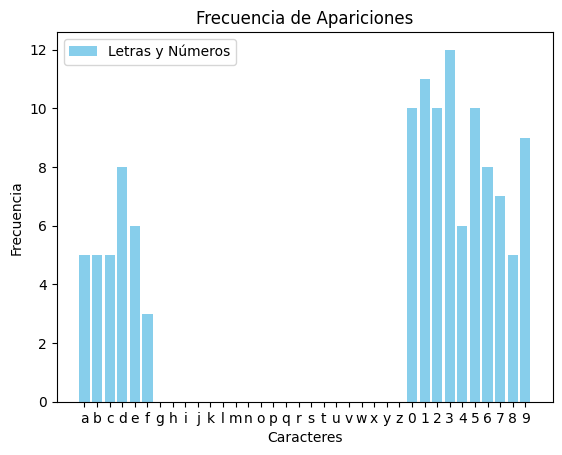

In [19]:
import matplotlib.pyplot as plt

characters, char_frecuency = letters + numbers, letters_f + numbers_f
plt.bar(characters, char_frecuency, color='skyblue', label='Letras y Números')
plt.xlabel('Caracteres')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Apariciones')
plt.legend()
plt.show()